In [69]:
import anndata as ad
import scanpy as sc
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict

In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
%run -i 0_functions.py

# Data

In [88]:
id_name = {}
counter = 0
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        id_name[counter] = {"rep": i, "subset": j, "cell_type": "mono"}
        counter += 1

for i in [1, 2, 3]:
    for j in range(division):
        id_name[counter] = {"rep": i, "subset": j, "cell_type": "ery"}
        counter += 1

In [89]:
id_name

{0: {'rep': 1, 'subset': 0, 'cell_type': 'mono'},
 1: {'rep': 1, 'subset': 1, 'cell_type': 'mono'},
 2: {'rep': 1, 'subset': 2, 'cell_type': 'mono'},
 3: {'rep': 1, 'subset': 3, 'cell_type': 'mono'},
 4: {'rep': 1, 'subset': 4, 'cell_type': 'mono'},
 5: {'rep': 2, 'subset': 0, 'cell_type': 'mono'},
 6: {'rep': 2, 'subset': 1, 'cell_type': 'mono'},
 7: {'rep': 2, 'subset': 2, 'cell_type': 'mono'},
 8: {'rep': 2, 'subset': 3, 'cell_type': 'mono'},
 9: {'rep': 2, 'subset': 4, 'cell_type': 'mono'},
 10: {'rep': 3, 'subset': 0, 'cell_type': 'mono'},
 11: {'rep': 3, 'subset': 1, 'cell_type': 'mono'},
 12: {'rep': 3, 'subset': 2, 'cell_type': 'mono'},
 13: {'rep': 3, 'subset': 3, 'cell_type': 'mono'},
 14: {'rep': 3, 'subset': 4, 'cell_type': 'mono'},
 15: {'rep': 1, 'subset': 0, 'cell_type': 'ery'},
 16: {'rep': 1, 'subset': 1, 'cell_type': 'ery'},
 17: {'rep': 1, 'subset': 2, 'cell_type': 'ery'},
 18: {'rep': 1, 'subset': 3, 'cell_type': 'ery'},
 19: {'rep': 1, 'subset': 4, 'cell_type': 'er

In [73]:
# pathx must be the path that represents the x values of the path. 
#       it also indexes datasetx, so they must be the same length or less
# pathy must be the path that represents the y values of the path.
#       it also indexes datasety, so they must be the same length or less
def avg_cost_path(pathx, pathy, matrix, datasetx, datasety):
    sorted_names1 = datasetx.obs["pseudotime"].sort_values().index
    sorted_names2 = datasety.obs["pseudotime"].sort_values().index
    print(max(pathx), max(pathy), len(sorted_names1), len(sorted_names2), matrix.shape)

    assert(max(pathx)) <= len(sorted_names1), (f"pathx (max val {max(pathx)}) contains indices that are out of bounds for datasetx (length {len(sorted_names1)})")
    assert(max(pathy)) <=  len(sorted_names2), (f"pathy (max val {max(pathy)}) contains indices that are out of bounds for datasety (length {len(sorted_names2)})")

    # check that at least one of the paths goes to the end of the matrix
    # assert(max(pathx) == len(sorted_names1) - 1 or max(pathy) == len(sorted_names2) - 1), f"at least one of the paths must go to the end of the matrix. path x goes to {max(pathx)} and path y goes to {max(pathy)}, but datasetx has {len(sorted_names1)} cells and datasety has {len(sorted_names2)} cells."

    avg_costx = defaultdict(list)
    avg_costy = defaultdict(list)

    for x, y in zip(pathx, pathy):
        # print(x, y, sorted_names1[x], sorted_names2[y])
        if x <= matrix.shape[1] and y <= matrix.shape[0]:
            cost = matrix[y-1, x-1]

            avg_costx[sorted_names1[x-1]].append(cost)
            avg_costy[sorted_names2[y-1]].append(cost)

    acx = [sum(x) / len(x) for x in avg_costx.values()]
    acy = [sum(x) / len(x) for x in avg_costy.values()]

    costx = pd.Series(acx, index=list(avg_costx.keys()))
    costy = pd.Series(acy, index=list(avg_costy.keys()))

    return costx, costy

In [81]:
results = pickle.load(open("data/results_no_dup_hvg_2.pkl", "rb"))

1063 1063


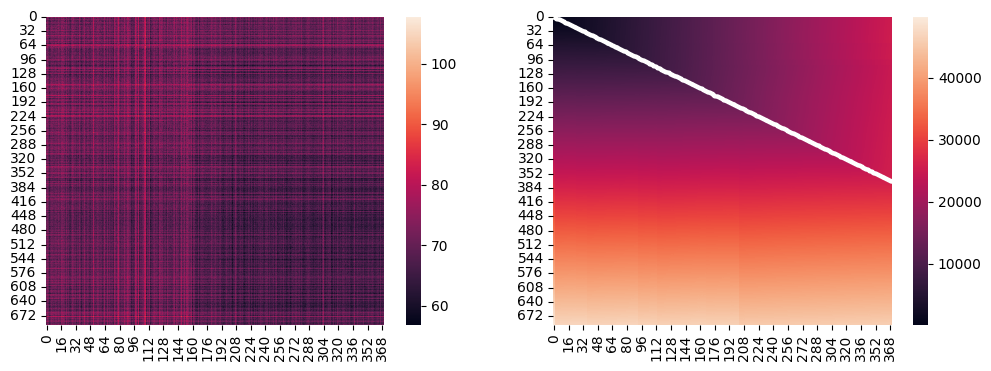

In [116]:
bad_d1_id = 3
bad_d2_id = 18
bad = results[bad_d1_id][bad_d2_id][0]

bad_dataset1 = read_with_pc(f"data/rep{id_name[bad_d1_id]['rep']}_{id_name[bad_d1_id]['cell_type']}_subset{id_name[bad_d1_id]['subset']}_hvg.h5ad")
bad_dataset2 = read_with_pc(f"data/rep{id_name[bad_d2_id]['rep']}_{id_name[bad_d2_id]['cell_type']}_subset{id_name[bad_d2_id]['subset']}_hvg.h5ad")

bad.plot_cost_distances()

In [117]:
bad_dataset1 = bad_dataset1[np.argsort(bad_dataset1.obs["pseudotime"])]
bad_dataset2 = bad_dataset2[np.argsort(bad_dataset2.obs["pseudotime"])]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T


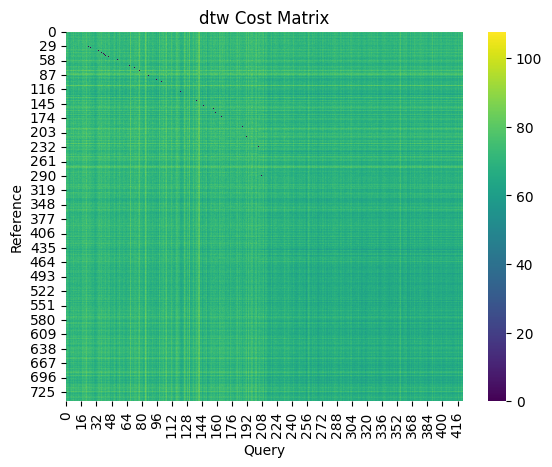

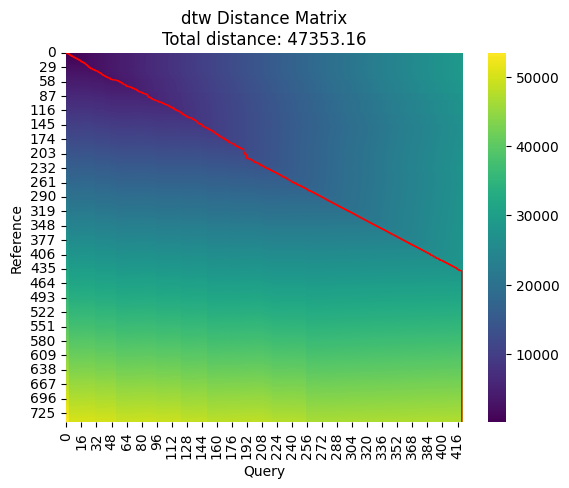

In [118]:
import dynchro

# run dynchro on bad_dataset1 and bad_dataset2
bad_result = dynchro.tl.dynchronize(
    bad_dataset1,
    bad_dataset2)

bad_result

In [103]:
results

[[0,
 [0,
  0,
 [0,
  0,
  0,
 [0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


1501 1501


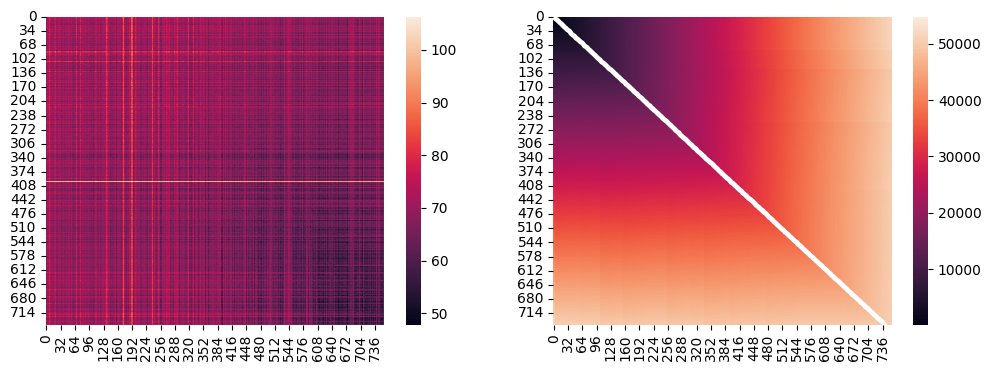

In [75]:
good_d1_id = 3
good_d2_id = 9
good = results[good_d1_id][good_d2_id][0]

good_dataset1 = read_with_pc(f"data/rep{id_name[good_d1_id]['rep']}_{id_name[good_d1_id]['cell_type']}_subset{id_name[good_d1_id]['subset']}_hvg.h5ad")
good_dataset2 = read_with_pc(f"data/rep{id_name[good_d2_id]['rep']}_{id_name[good_d2_id]['cell_type']}_subset{id_name[good_d2_id]['subset']}_hvg.h5ad")

good.plot_cost_distances()

In [76]:
def assign_cost(path1, path2, matrix, dataset1, dataset2):
    cost1, cost2 = avg_cost_path(pathx=path2, pathy=path1, matrix=matrix, datasetx=dataset1, datasety=dataset2)

    dataset1.obs["avg_cost"] = cost1
    dataset2.obs["avg_cost"] = cost2

    # sc.pl.scatter(dataset1, x="pseudotime", y="avg_cost", color="cell_type", title="Dataset 1 Average Cost vs Pseudotime")
    # sc.pl.scatter(dataset2, x="pseudotime", y="avg_cost", color="cell_type", title="Dataset 2 Average Cost vs Pseudotime")

    return dataset1, dataset2

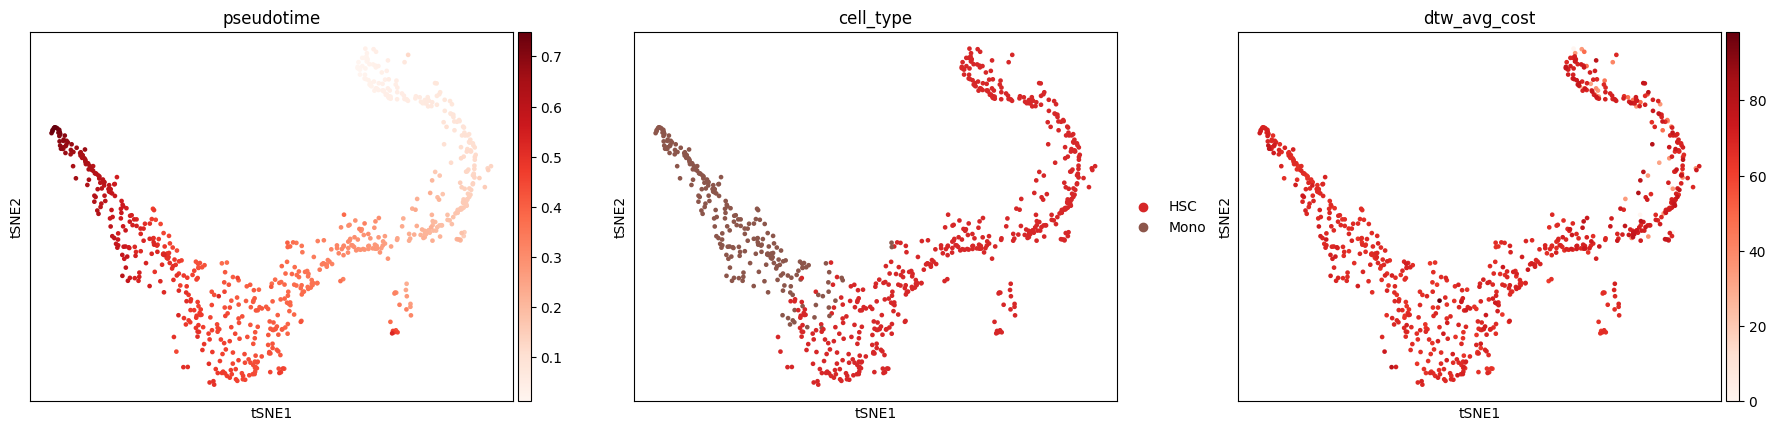

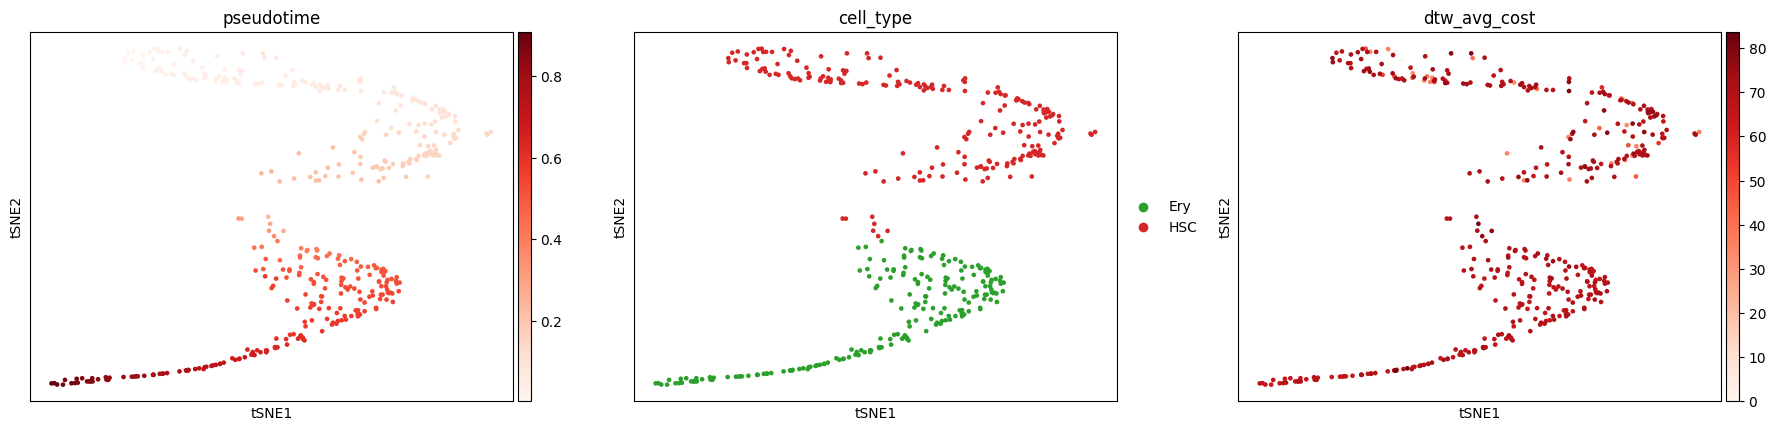

In [122]:
bad_dataset1 = dynchro.tl.avg_cost_path(bad_dataset1)
bad_dataset2 = dynchro.tl.avg_cost_path(bad_dataset2)

# bad_path1 = flatten(bad.path1().values())
# bad_path2 = flatten(bad.path2().values())

# bad_dataset1, bad_dataset2 = assign_cost(bad_path1, bad_path2, bad.cost(), bad_dataset1, bad_dataset2)

sc.pl.tsne(bad_dataset1, color = ["pseudotime", "cell_type", "dtw_avg_cost"], cmap= "Reds", s = 45)
sc.pl.tsne(bad_dataset2, color = ["pseudotime", "cell_type", "dtw_avg_cost"], cmap= "Reds", s = 45)


743 757 744 758 (744, 758)


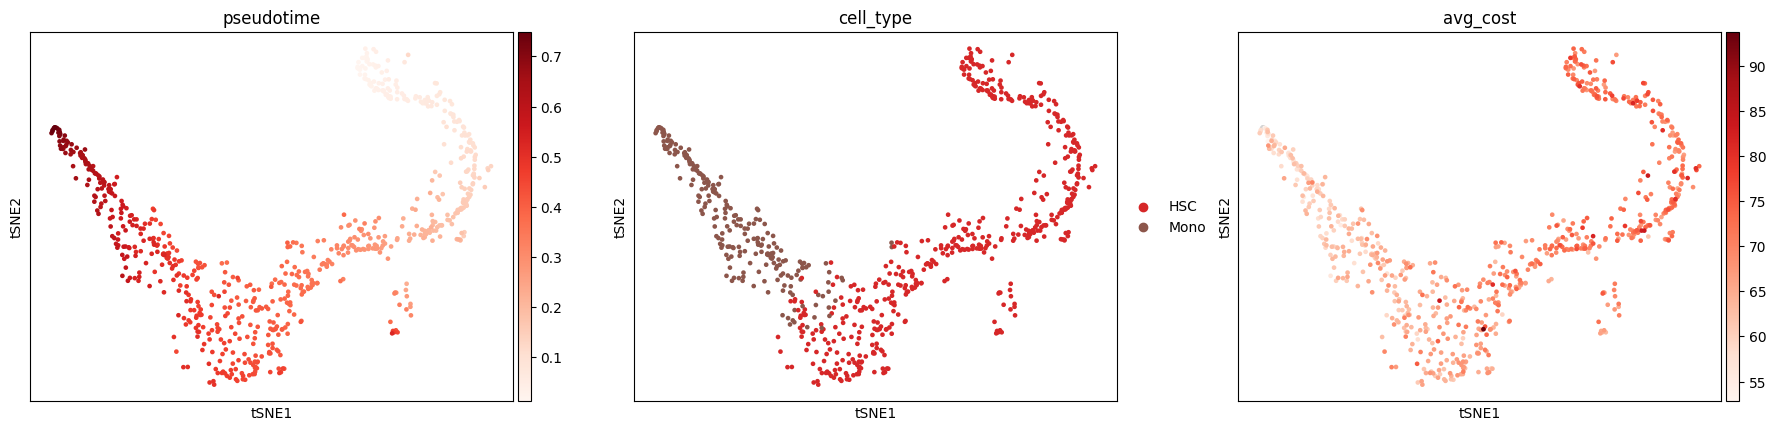

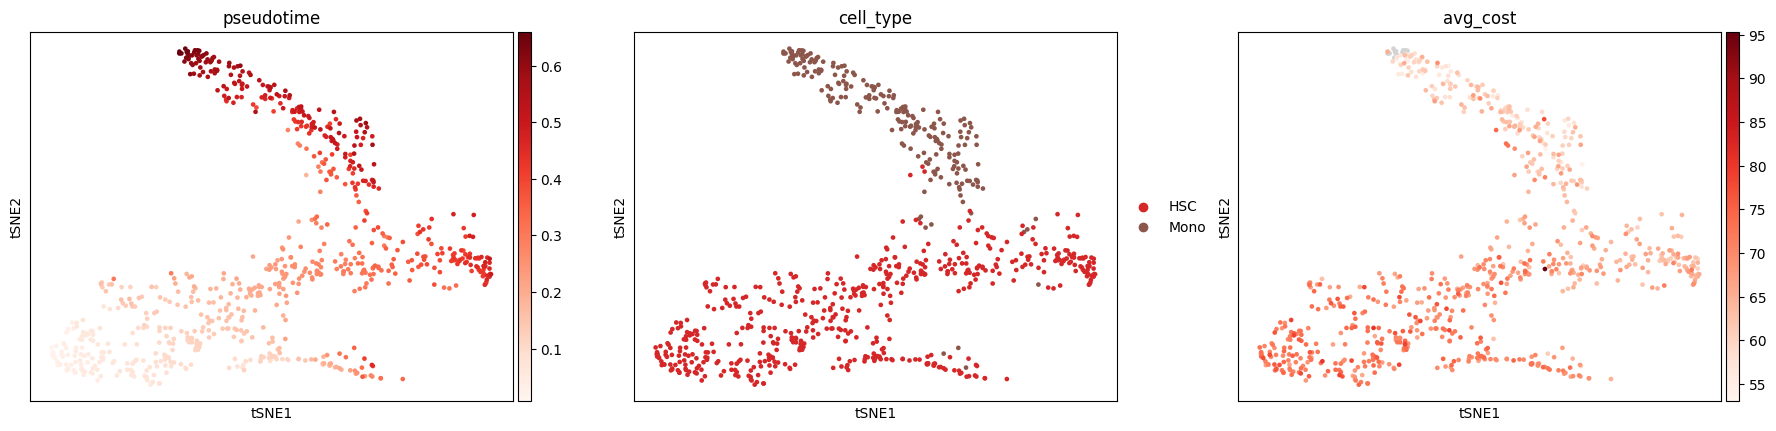

In [78]:
good_path1 = flatten(good.path1().values())
good_path2 = flatten(good.path2().values())

good_dataset1, good_dataset2 = assign_cost(good_path1, good_path2, good.cost(), good_dataset1, good_dataset2)

sc.pl.tsne(good_dataset1, color = ["pseudotime", "cell_type", "avg_cost"], cmap= "Reds", s = 45)
sc.pl.tsne(good_dataset2, color = ["pseudotime", "cell_type", "avg_cost"], cmap= "Reds", s = 45)


# Scatterplot figures

In [24]:
def get_colors(colors, labels):
    color_map = {label: colors[i] for i, label in enumerate(np.unique(labels))}
    translated_colors = np.array([color_map[c] for c in labels])

    handles, labels = get_color_legend(color_map)

    return translated_colors, handles, labels

def get_color_legend(color_map):
    handles = [
        plt.Line2D(
                [0], [0], marker='o', markerfacecolor=c, color = "k", 
                markersize = 9, lw = 0
            ) for c in color_map.values()
        ]
    labels = list(color_map.keys())
    return handles, labels

In [66]:
def plot_celltypes(adata, axes):
    xs = adata.obsm['X_tsne'][:, 0]
    ys = adata.obsm['X_tsne'][:, 1]
    labels = adata.obs['cell_type'].values

    colors = ["#EF69BA", "#EF7269", "#EFCB69", "#BAEF69", "#69EF72", "#69EFCB", "#69BAEF", "#7269EF", "#CB69EF"]
    colors = [
        "#4269d0", 
        "#efb118",
        "#ff725c",
        "#6cc5b0",
        "#3ca951",
        "#ff8ab7",
        "#a463f2",
        "#97bbf5",
        "#9c6b4e",
        "#9498a0"
    ]
    colors = [colors[1], colors[5]]

    translated_colors, handles, labels = get_colors(colors, labels)

    ax = axes[0]

    ax.scatter(xs, ys, c=translated_colors,  s=75, edgecolors = 'k')
    ax.set_title("Cell types")

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    # ax.set_xlabel("Flat tree plot")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_coords(0.25, 0.95)
    ax.set_ylabel("")
    
    axes[1].axis('off')

    axes[1].legend(handles=handles, labels=labels, title="Cell Types", loc='best', frameon=False, fontsize="xx-small", title_fontsize="small")
    
    return ax

In [127]:
import seaborn as sns
import matplotlib.colors as clr
import matplotlib as mpl
def plot_pseudotime(adata, axes, title, labels=None, colors=None):

    xs = adata.obsm['X_tsne'][:, 0]
    ys = adata.obsm['X_tsne'][:, 1]
    if labels is None:
        labels = adata.obs['pseudotime'].values
        labels = (labels - labels.min()) / (labels.max() - labels.min())

    if colors is None:
        tints = ["#69BAEF", "#80C2F1", "#95CBF3", "#A9D3F5", "#BBDCF7", "#CDE5F9", "#DEEDFB", "#EEF6FD", "#FFFFFF"]
        shades = ["#4DA2D5", "#2C8ABC", "#0073A3", "#005D8B", "#004774"][::-1]
        colors = shades + tints

    palette = clr.LinearSegmentedColormap.from_list("custom", colors, N=256)

    ax = axes[0]
    ax.scatter(xs, ys, c=labels, cmap=palette, s=100, edgecolors = 'k')

    norm = mpl.colors.Normalize(vmin=labels.min(), vmax=labels.max())

    axes[1].axis('off')

    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=palette),
                ax=axes[1], orientation='vertical', label='Pseudotime',
                fraction=0.75, shrink=0.75)

    ax.set_title(title)

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    # ax.set_xlabel("Flat tree plot")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_coords(0.25, 0.95)
    ax.set_ylabel("")


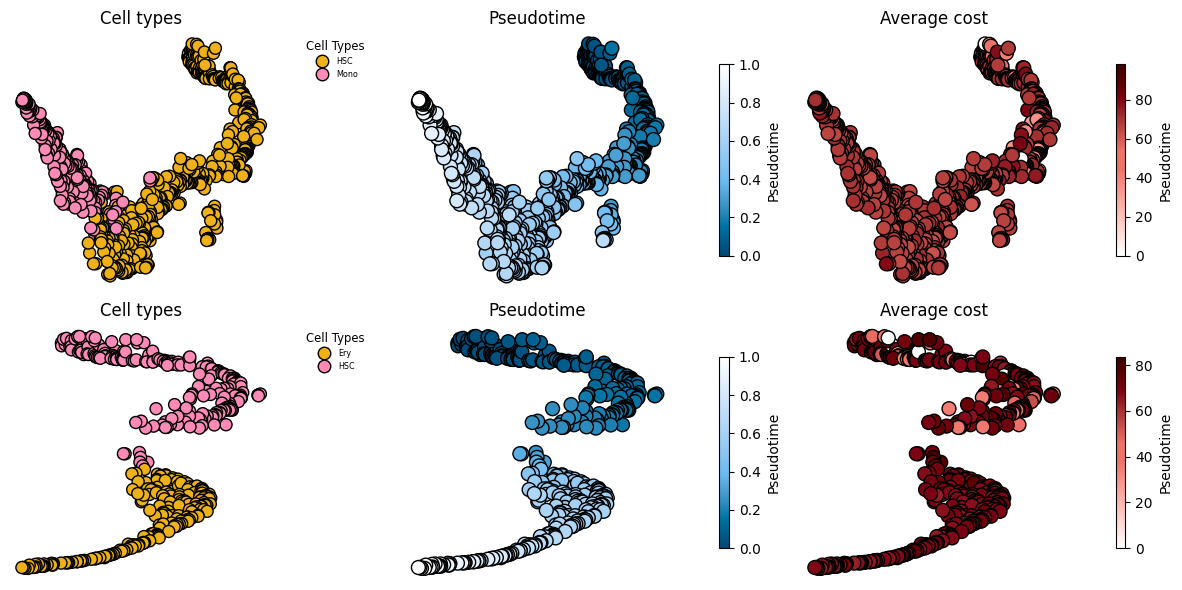

In [129]:
fig, axes = plt.subplots(2, 6, figsize=(12, 6), gridspec_kw={'width_ratios': [8, 2, 8, 2, 8, 2]})
plot_celltypes(bad_dataset1, [axes[0, 0], axes[0, 1]])
plot_celltypes(bad_dataset2, [axes[1, 0], axes[1, 1]])

plot_pseudotime(bad_dataset1, [axes[0, 2], axes[0, 3]], "Pseudotime")
plot_pseudotime(bad_dataset2, [axes[1, 2], axes[1, 3]], "Pseudotime")

red_tints = ['#EF7269', '#F78F85', '#FCACA2', '#FFC7C0', '#FFE3DF', '#FFFFFF'][::-1]
red_shades = ['#EF7269', '#C8504B', '#A22E2E', '#7D0214', '#5A0000', '#3E0000']

red_colors = red_tints + red_shades

plot_pseudotime(bad_dataset1, [axes[0, 4], axes[0, 5]], "Average cost", labels=bad_dataset1.obs["dtw_avg_cost"].values, colors=red_colors)
plot_pseudotime(bad_dataset2, [axes[1, 4], axes[1, 5]], "Average cost", labels=bad_dataset2.obs["dtw_avg_cost"].values, colors=red_colors)
plt.tight_layout()

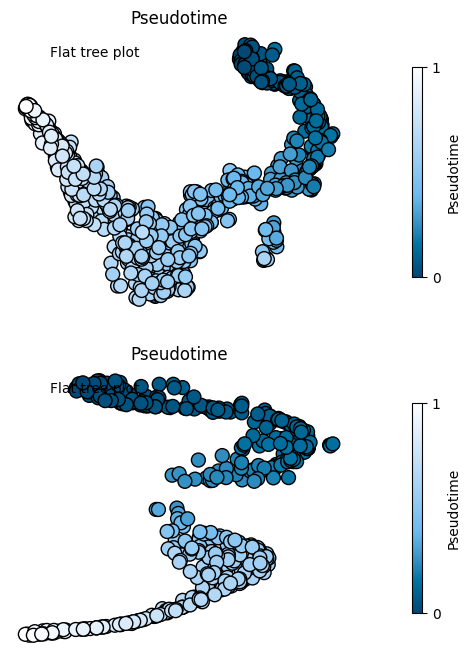

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(6, 8), gridspec_kw={'width_ratios': [8, 2]})
plot_pseudotime(bad_dataset1, [axes[0, 0], axes[0, 1]], "Pseudotime")
plot_pseudotime(bad_dataset2, [axes[1, 0], axes[1, 1]], "Pseudotime")